<a href="https://colab.research.google.com/github/JangYuSeung/My_ML_Course_Notebook/blob/main/SVM_%EC%8B%A4%EC%8A%B5_base_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (GD Method)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

## Dataset

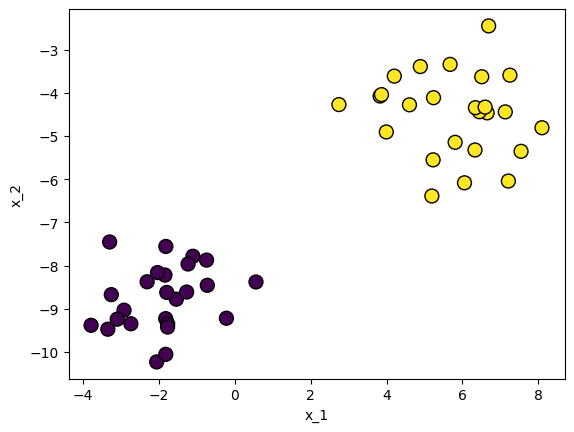

In [19]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=1)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

## Dataset label 설정

In [20]:
y = np.where(y<=0, -1, 1) # y가 0보다 작은 건 -1로, 0보다 큰 건 1로 둬서 분류하겠다
# y는 0, 1의 값을 가지고 있음
#Binary classification을 위해 정답 데이터를 -1, 1로 변경

## Model


In [21]:
class SVM:
    def __init__(self, learning_rate=0.001, n_iters=1000): # 클래스 생성 시 변수 초기화 부분
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None  # 가중치 벡터
        self.bias = None  # 절편

    def fit(self, X, y): #Optimal Hyperplane 을 찾는 함수
        """
        SVM 모델 학습
        - X: 입력 데이터 (data 개수 x feature 개수)
        - y: 타겟 레이블 (data 개수만큼 -1 또는 1로 이루어진 배열)
        """
        n_samples, n_features = X.shape # n_samples: 데이터 개수

        # Weight 및 bias 초기화
        self.weights = np.zeros(n_features)  # 가중치 벡터 w
        self.bias = 0  # 절편 b

        # Gradient Decent
        for _ in range(self.n_iters):
          for idx in range(n_samples): # 각 index에 맞는 데이터 가져옴
            x_i = X[idx]
            y_i = y[idx]

            condition = y_i * (np.dot(self.weights.T,x_i) + self.bias) >= 1 # y_i(W^T*X + b) >= 1

            if condition:
              continue # for문 pass
            else:  # Gradient Decent 식을 이용해 weights와 bias 업데이트
              self.weights = self.weights - self.learning_rate * ( -np.dot(y_i, x_i)) # Loss를 w로 편미분한 결과를 곱
              self.bias = self.bias - self.learning_rate * (-y_i) # Loss를 b로 편미분한 결과를 곱

    def predict(self, X):
        """
        새로운 데이터에 대한 클래스 예측
        - X: 입력 데이터
        - 반환값: 예측된 클래스 레이블 (-1 또는 1)
        """
        # 결정 함수: w^T * x + b
        linear_output = np.dot(X, self.weights) + self.bias
        # sign 함수로 -1 또는 1로 변환
        return np.sign(linear_output)


## Training

In [22]:
model = SVM()
model.fit(X, y)

print(model.weights, model.bias)

[0.60413086 0.16688988] 0.058000000000000045


In [23]:
margin = 2 / np.sqrt(np.dot(model.weights.T, model.weights))
print(margin)

3.1910212637738264


In [24]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

def visualize_svm(w, b):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.show()

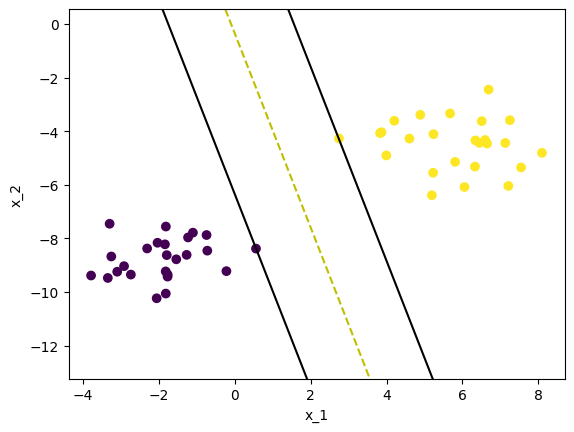

In [25]:
visualize_svm(model.weights, model.bias)

# SVM 심화



In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## Dataset

/tmp/ipython-input-2845059207.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Classes")


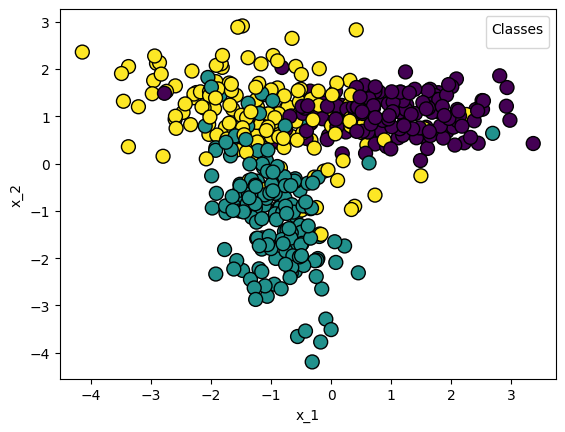

In [27]:
X, y = make_classification(n_samples=500,
                           n_features=2,
                           n_classes=3,
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           random_state=40)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=1)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(title="Classes")
plt.show()

## Model

In [28]:
class SVM:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None  # 가중치 벡터
        self.bias = None  # 절편

    def fit(self, X, y):
        """
        SVM 모델 학습
        - X: 입력 데이터 (data 개수 x feature 개수)
        - y: 타겟 레이블 (data 개수만큼 -1 또는 1로 이루어진 배열)
        """
        n_samples, n_features = X.shape # n_samples: 데이터 개수

        # Weight 및 bias 초기화
        self.weights = np.zeros(n_features)  # 가중치 벡터
        self.bias = 0  # 절편

        # Gradient Decent
        for _ in range(self.n_iters):
          for idx in range(n_samples):
            x_i = X[idx]
            y_i = y[idx]

            condition = y_i * np.dot(self.weights.T, x_i) + self.bias >= 1

            if condition:
              continue
            else: #Gradient Decent식을 이용해 w와 b 업데이트
              self.weights = self.weights = self.learning_rate * (-np.dot(y_i,x_i))
              self.bias = self.bias - self.learning_rate * (-y_i)

    def predict(self, X):
        """
        새로운 데이터에 대한 클래스 예측
        - X: 입력 데이터
        - 반환값: 예측된 클래스 레이블 (-1 또는 1)
        """
        # 결정 함수: w^T * x + b
        linear_output = np.dot(X, self.weights) + self.bias
        # sign 함수로 -1 또는 1로 변환
        return np.sign(linear_output)


## Training

In [29]:
# model 1
model1 = SVM()

# model 1 training
# y가 0인 클래스와 1,2인 클래스를 분류
temp_y = np.where(y==0, -1, 1) # y가 0일 때만 -1로 설정, 그 외는 1로 설정
model1.fit(X, temp_y)

print(model1.weights, model1.bias)

# model 2
model2 = SVM()

# model 2 training
# y가 1인 클래스와 그 외 두 클래스를 묶어 분류
temp_y = np.where(y==1, -1, 1) # y가 1일 때만 -1로 설정, 그 외는 1로 설정
model2.fit(X, temp_y)

print(model2.weights, model2.bias)




# model 3
model3 = SVM()

# model 3 training
temp_y = np.where(y==2, -1, 1) # y가 2일 때만 -1로 설정, 그 외는 1로 설정
model3.fit(X, temp_y)
print(model3.weights, model3.bias)

[ 0.00291098 -0.0021184 ] 1.0179999999999987
[ 0.00337719 -0.00204991] 1.0189999999999986
[0.00125963 0.00287237] 1.0129999999999992


## 시각화

/tmp/ipython-input-1900990010.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=(1.01, 0.77), frameon=True, shadow=True)


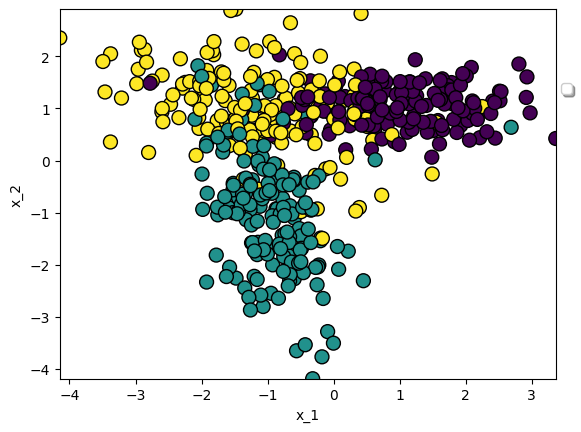

In [30]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

def visualize_svm(w, b, w2, b2, w3, b3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=1)
    plt.xlabel("x_1")
    plt.ylabel("x_2")

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x2_1 = get_hyperplane_value(x0_1, w2, b2, 0)
    x2_2 = get_hyperplane_value(x0_2, w2, b2, 0)

    x3_1 = get_hyperplane_value(x0_1, w3, b3, 0)
    x3_2 = get_hyperplane_value(x0_2, w3, b3, 0)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k--")
    ax.plot([x0_1, x0_2], [x2_1, x2_2], "k--")
    ax.plot([x0_1, x0_2], [x3_1, x3_2], "k--")

    plt.xlim([np.min(X[:, 0]), np.max(X[:, 0])])
    plt.ylim([np.min(X[:, 1]), np.max(X[:, 1])])

    plt.legend(loc=(1.01, 0.77), frameon=True, shadow=True)
    plt.show()

visualize_svm(model1.weights, model1.bias, model2.weights, model2.bias, model3.weights, model3.bias)

In [31]:
# 사진 보고 코드 작성
test_data = [ -1.5, 2.1]
test_data = np.array(test_data).reshape(1,2)

class0 = model1.predict(test_data)
class1 = model2.predict(test_data)
class2 = model3.predict(test_data)

print('is class 1 or 2? ', class0)
print('is class 0 or 2? ', class1)
print('is class 0 or 1? ', class2)

is class 1 or 2?  [1.]
is class 0 or 2?  [1.]
is class 0 or 1?  [1.]
